In [922]:
# import statements
import os
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from matplotlib import transforms
import scipy.ndimage as snd
from scipy import ndimage, misc

# Note that there was a dead pixel at (630, 309) on our CCD, both observing times
# Therefore any line thats like var[308][628] = var[309][629] is me accounting for the
# pixel that is currently ruining my life by setting it equal to just a random pixel nearby


## Lab 7

In [923]:
# Biases
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')
    # I know I have an inefficient way of keeping files

biases = glob.glob('**/bias_0s_*.FIT')
biases

['bias\\bias_0s_001.FIT',
 'bias\\bias_0s_002.FIT',
 'bias\\bias_0s_003.FIT',
 'bias\\bias_0s_004.FIT',
 'bias\\bias_0s_005.FIT',
 'bias\\bias_0s_006.FIT',
 'bias\\bias_0s_007.FIT',
 'bias\\bias_0s_008.FIT',
 'bias\\bias_0s_009.FIT',
 'bias\\bias_0s_010.FIT']

In [924]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
mean_bias[308][628] = mean_bias[309][629]

stddev_bias = np.std(bias_timestream, axis=0)
stddev_bias[308][628] = stddev_bias[309][629]

readnoise = np.mean(stddev_bias)

del bias_timestream

In [925]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

4.923827366324085

In [926]:
# Darks
    # darks for .04s, .1s, .5s, 1s, 3s, 45s, 50s

darks_40ms = glob.glob("**/dark_0d4*.FIT")
darks_100ms = glob.glob("**/dark_0d1s_*.FIT")
darks_500ms = glob.glob("**/dark_0d5s_*.FIT")
darks_1s = glob.glob("**/dark_10*.FIT")
darks_3s = glob.glob("**/dark_3s_*.FIT")
darks_45s = glob.glob("**/dark_45*.FIT")
darks_50s = glob.glob("**/dark_50s_*FIT")

darks_40ms

['darks\\dark_0d4001.FIT',
 'darks\\dark_0d4002.FIT',
 'darks\\dark_0d4003.FIT',
 'darks\\dark_0d4004.FIT',
 'darks\\dark_0d4005.FIT',
 'darks\\dark_0d4006.FIT',
 'darks\\dark_0d4007.FIT',
 'darks\\dark_0d4008.FIT',
 'darks\\dark_0d4009.FIT',
 'darks\\dark_0d4010.FIT',
 'darks\\dark_0d4_.FIT']

In [927]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')

darks_40ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_40ms]
average_40ms_dark = np.mean(darks_40ms, axis=0)
average_40ms_dark[308][628] = average_40ms_dark[309][629]
stddev_40ms_dark = np.std(darks_40ms, axis=0)

darks_100ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_100ms]
average_100ms_dark = np.mean(darks_100ms, axis=0)
average_100ms_dark[308][628] = average_100ms_dark[309][629]
stddev_100ms_dark = np.std(darks_100ms, axis=0)

darks_500ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_500ms]
average_500ms_dark = np.mean(darks_500ms, axis=0)
average_500ms_dark[308][628] = average_500ms_dark[309][629]
stddev_500ms_dark = np.std(darks_500ms, axis=0)

darks_1s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_1s]
average_1s_dark = np.mean(darks_1s, axis=0)
average_1s_dark[308][628] = average_1s_dark[309][629]
stddev_1s_dark = np.std(darks_1s, axis=0)

darks_3s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_3s]
average_3s_dark = np.mean(darks_3s, axis=0)
average_3s_dark[308][628] = average_3s_dark[309][629]
stddev_3s_dark = np.std(darks_3s, axis=0)

darks_45s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_45s]
average_45s_dark = np.mean(darks_45s, axis=0)
average_45s_dark[308][628] = average_45s_dark[309][629]
stddev_45s_dark = np.std(darks_45s, axis=0)

darks_50s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_50s]
average_50s_dark = np.mean(darks_50s, axis=0)
average_50s_dark[308][628] = average_50s_dark[309][629]
stddev_50s_dark = np.std(darks_50s, axis=0)

In [928]:
uncertainty_on_40ms_mean_dark = stddev_40ms_dark / np.sqrt(len(darks_40ms))
uncertainty_on_100ms_mean_dark = stddev_100ms_dark / np.sqrt(len(darks_100ms))
uncertainty_on_500ms_mean_dark = stddev_500ms_dark / np.sqrt(len(darks_500ms))
uncertainty_on_1s_mean_dark = stddev_1s_dark / np.sqrt(len(darks_1s))
uncertainty_on_3s_mean_dark = stddev_3s_dark / np.sqrt(len(darks_3s))
uncertainty_on_45s_mean_dark = stddev_45s_dark / np.sqrt(len(darks_45s))
uncertainty_on_50s_mean_dark = stddev_50s_dark / np.sqrt(len(darks_50s))

del darks_40ms
del darks_100ms
del darks_500ms
del darks_1s
del darks_3s
del darks_45s
del darks_50s

# TEST BEGIN


In [929]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')

B_flat_m42 = glob.glob("**/flat_b_1s*.FIT")
I_flat_m42 = glob.glob("**/flat_i_1s*.FIT")
V_flat_m42 = glob.glob("**/flat_v_1s*.FIT")

B_quad1_m42 = glob.glob("**/m42_45s_q1_b_*.FIT")
B_quad2_m42 = glob.glob("**/m42_45s_q2_b_*.FIT")
B_quad3_m42 = glob.glob("**/m42_45s_q3_b_*.FIT")
B_quad4_m42 = glob.glob("**/m42_45s_q4_b_*.FIT")

I_quad1_m42 = glob.glob("**/m42_45s_q1_i_*.FIT")
I_quad2_m42 = glob.glob("**/m42_45s_q2_i_*.FIT")
I_quad3_m42 = glob.glob("**/m42_45s_q3_i_*.FIT")
I_quad4_m42 = glob.glob("**/m42_45s_q4_i_*.FIT")

V_quad1_m42 = glob.glob("**/m42_45s_q1_v_*.FIT")
V_quad2_m42 = glob.glob("**/m42_45s_q2_v_**.FIT")
V_quad3_m42 = glob.glob("**/m42_45s_q3_v_*.FIT")
V_quad4_m42 = glob.glob("**/m42_45s_q4_v_*.FIT")

In [930]:
# B filter shit
B_flat_m42_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_flat_m42]
mean_B_flat_m42 = np.mean(B_flat_m42_timestream, axis=0)
del B_flat_m42_timestream

mean_B_flat_m42[308][628] = mean_B_flat_m42[309][629]

bias_subtracted_B_flat_m42 = mean_B_flat_m42 - mean_bias
B_gain = fits.getheader('flat\\flat_b_1s001.FIT')['EGAIN']
flat_poisson_uncertainty_m42 = (bias_subtracted_B_flat_m42)**0.5
flat_singleframe_uncertainty_m42 = (flat_poisson_uncertainty_m42**2 + readnoise**2)**0.5
flat_total_uncertainty_m42_B = ((flat_singleframe_uncertainty_m42/np.sqrt(len(B_flat_m42)))**2 + mean_bias_noise**2)**0.5
mean_of_flat_m42 = np.mean(bias_subtracted_B_flat_m42)
normalized_mean_B_flat_m42 = bias_subtracted_B_flat_m42 / mean_of_flat_m42
np.mean(normalized_mean_B_flat_m42)

0.9999999999999999

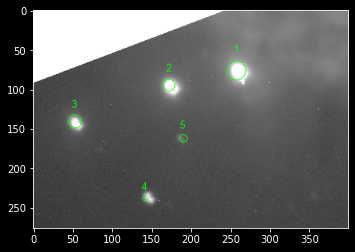

In [931]:
# Testing on B filter of quadrant 3
B_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_quad3_m42]

image1 = B_timestream[0]
image1[308][628] = image1[309][629]

image2 = B_timestream[1]
image2[308][628] = image2[309][629]

image3 = B_timestream[2]
image3[308][628] = image3[309][629]

# The five stars that I'm using, at least for Q3, Are:
# 1: * tet02 Ori A
# 2: * tet02 Ori B
# 3: * tet02 Ori C
# 4: V* V1073 Ori
# 5: V* AK Ori
# As determined through DS9 using SIMBAD catalog and 2MASS image server
# Also determining the coordinates of each star in each image through DS9
# A bit inefficient, but it's fine
# Also not very accurate by any means but it's better than having visible duplicates in the data :-/

# Stars as shown
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')
fn = "fivestarsq3.png"

im = img.imread(fn)
plt.imshow(im, origin='upper')

In [932]:
# Coordinates switched from what they are given in DS9 as because numpy does its arrays backwards
# First image coordinates of two stars (1 and 2)
x_1_f, y_1_f = 116, 292
x_2_f, y_2_f = 102, 379
# Second image coordinates of two stars (also 1 and 2)
x_1_s, y_1_s = 78, 259
x_2_s, y_2_s = 66, 347
# Third image coordinates of two stars (also also 1 and 2)
x_1_t, y_1_t = 35, 257
x_2_t, y_2_t = 26, 346

# Differences
# Diff between star 1 between first and second images
x_12_del_pt1 = x_1_f - x_1_s
y_12_del_pt1 = y_1_f - y_1_s
# Diff between star 2 between first and second images
x_12_del_pt2 = x_2_f - x_2_s
y_12_del_pt2 = y_2_f - y_2_s
# Diff between star 1 between first and third images
x_13_del_pt1 = x_1_f - x_1_t
y_13_del_pt1 = y_2_f - y_2_t
# Diff between star 2 between first and third images
x_13_del_pt2 = x_2_f - x_2_t
y_13_del_pt2 = y_2_f - y_2_t

# Angles
angle_12i = math.degrees(math.atan2(y_12_del_pt1, x_12_del_pt1))
angle_12f = math.degrees(math.atan2(y_12_del_pt2, x_12_del_pt2))
angle_to_rotate_12 = angle_12i - angle_12f

angle_13i = math.degrees(math.atan2(y_13_del_pt1, x_13_del_pt1))
angle_13f = math.degrees(math.atan2(y_13_del_pt2, x_13_del_pt2))
angle_to_rotate_13 = angle_13i - angle_13f

# Referenced because I don't remember basic trigonometry <3
# https://stackoverflow.com/questions/64848185/python-pil-rotate-and-scale-image-so-that-two-points-match-two-other-points

In [933]:
# def shift_image(X, dx, dy):
#     X = np.roll(X, dy, axis=0)
#     X = np.roll(X, dx, axis=1)
#     if dy>0:
#         X[:dy, :] = None
#     elif dy<0:
#         X[dy:, :] = None
#     if dx>0:
#         X[:, :dx] = None
#     elif dx<0:
#         X[:, dx:] = None
#     return X

# https://stackoverflow.com/questions/27087139/shifting-an-image-in-numpy

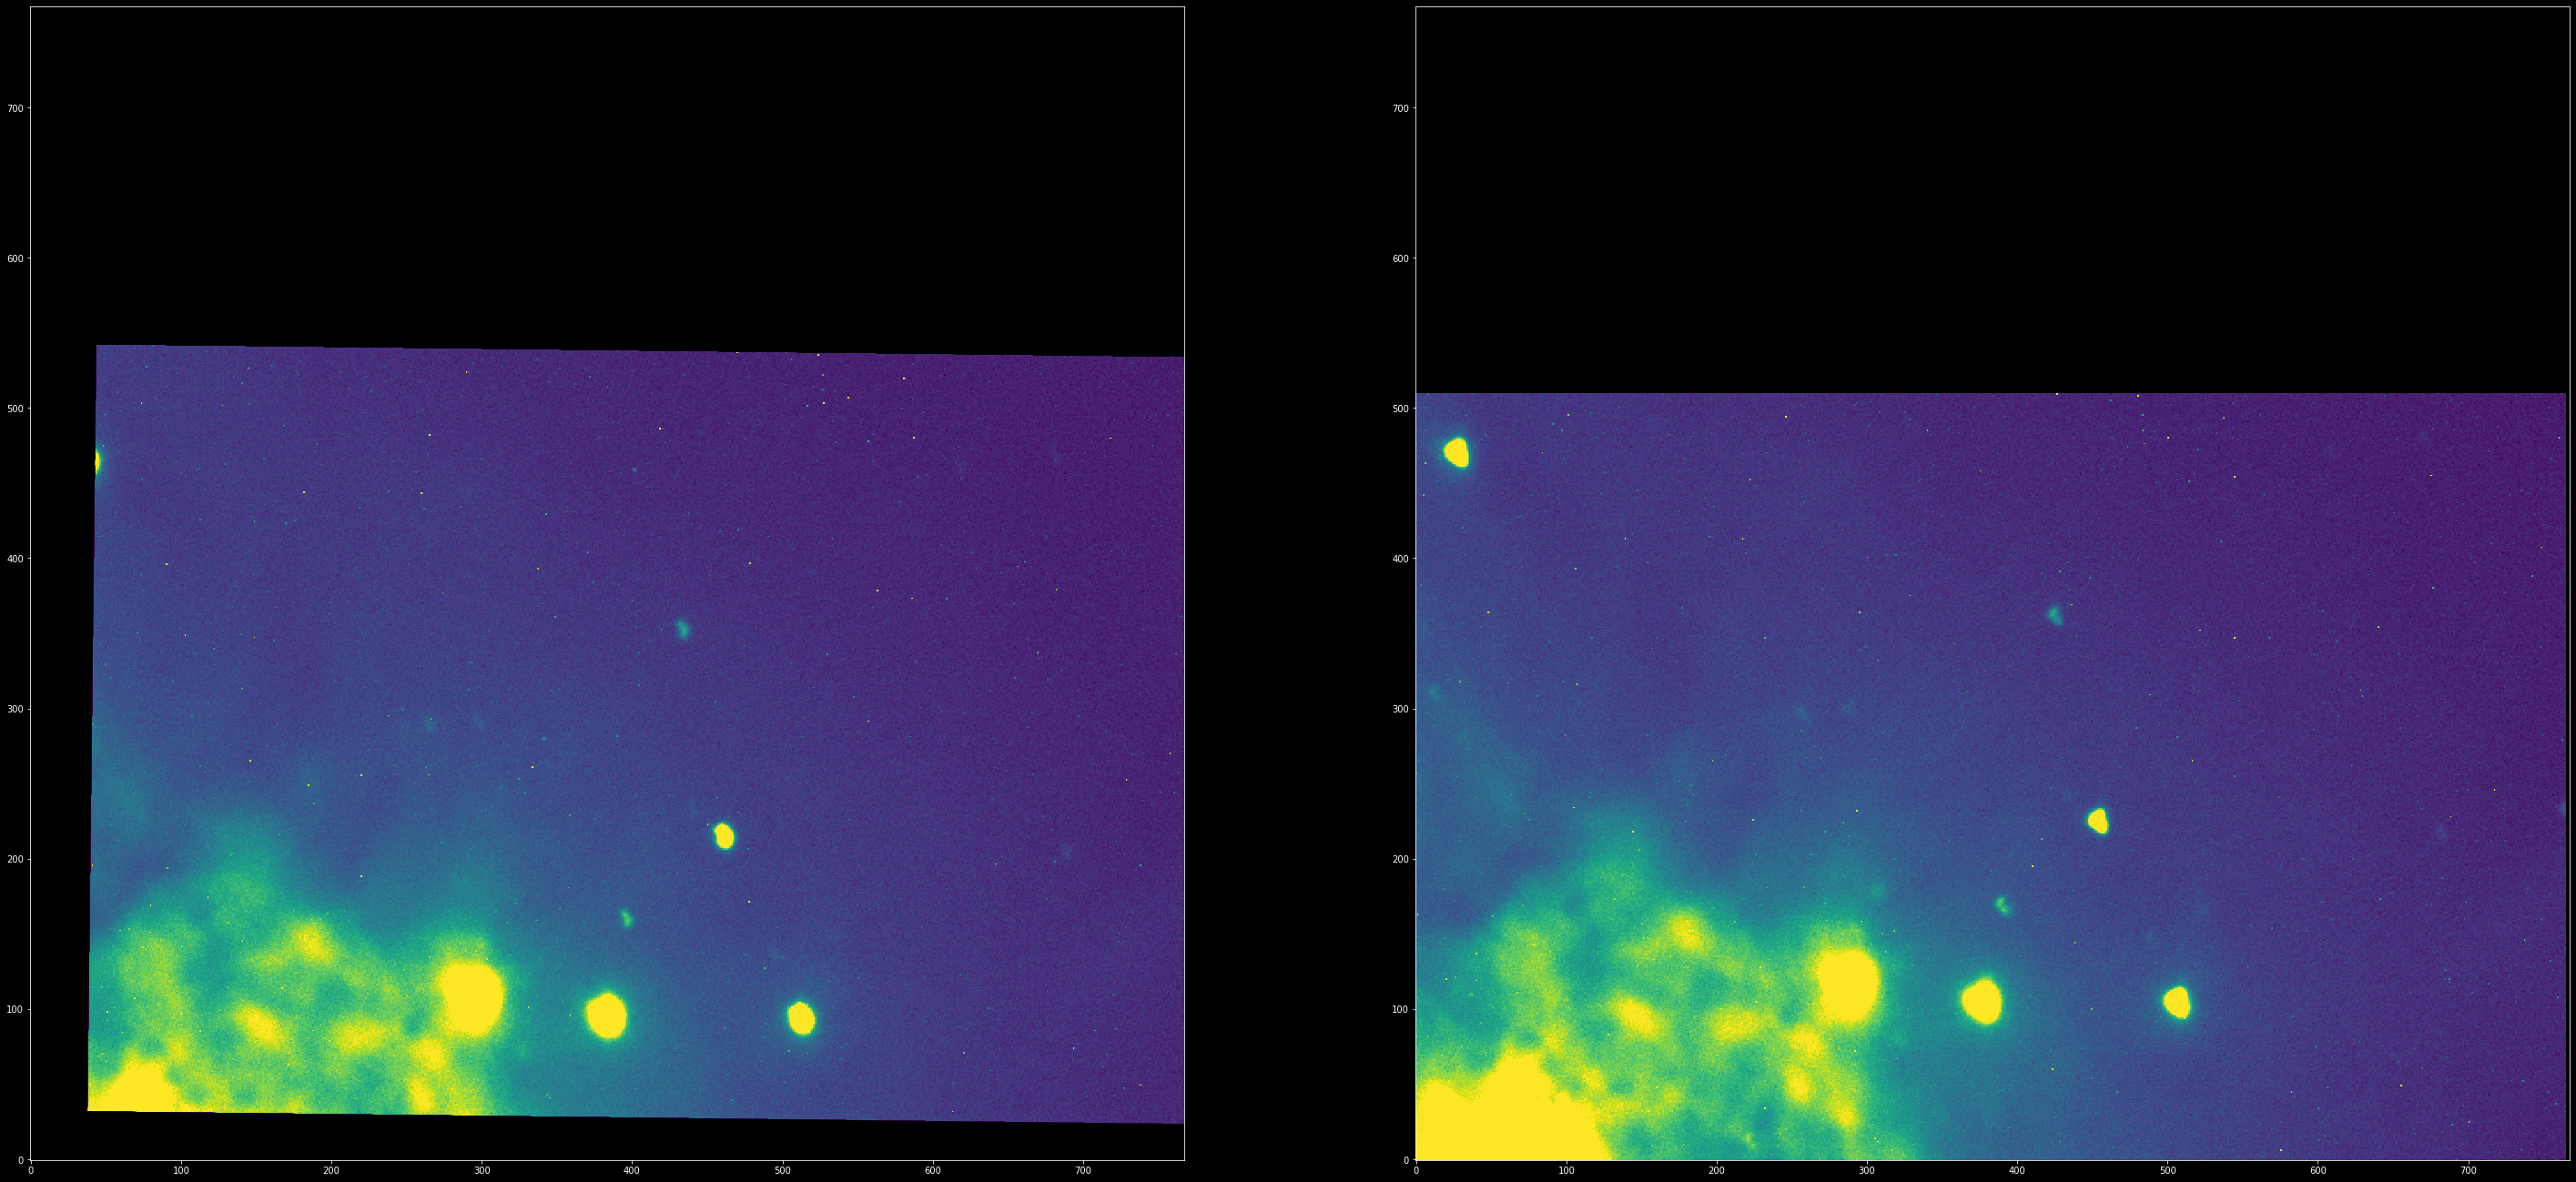

<ipython-input-934-a027cb1d4600>:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


ValueError: cannot reshape array of size 11028510 into shape (3600,3600)

In [934]:
bigim1 = np.zeros([768,768])*np.nan
bigim2 = np.zeros([768,768])*np.nan

bigim1[0:image1.shape[0], 0:image1.shape[1]] = image1
bigim2[0:image2.shape[0], 0:image2.shape[1]] = image2

fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

tr = transforms.Affine2D().translate(tx=x_12_del_pt1, ty=y_12_del_pt1)
bigim2 =

ax.imshow(bigim2, transform=tr + ax.transData, origin='lower', interpolation='none', vmax=1800*B_gain)
ax1.imshow(bigim1, origin='lower', interpolation='none', vmax=1800*B_gain)

plt.show()

data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
bigim2 = data.reshape([768,768])


In [ ]:
counts1 = np.isfinite(bigim1).astype('int')
counts2 = np.isfinite(bigim2).astype('int')

These "counts" images show where the images live in the big canvas:

In [ ]:
pl.subplot(1,2,1).imshow(counts1)
_=pl.xlabel("X pixel (Mosaic Coordinates)")
_=pl.ylabel("Y pixel (Mosaic Coordinates)")
pl.subplot(1,2,2).imshow(counts2)
_=pl.xlabel("X pixel (Mosaic Coordinates)")
_=pl.ylabel("Y pixel (Mosaic Coordinates)")

In [ ]:
totalcounts = counts1+counts2

In [ ]:
pl.imshow(totalcounts)
cb=pl.colorbar()
cb.set_label("Number of images contributing to mosaic")
_=pl.xlabel("X pixel (Mosaic Coordinates)")
_=pl.ylabel("Y pixel (Mosaic Coordinates)")

So if we want our mosaic to be the *average* of the inputs, we need to sum them, then divide by the number of images that went into the sum:

In [ ]:
bigim = (np.nan_to_num(bigim1)+np.nan_to_num(bigim2)) / (totalcounts)
# then, we set the "blank" pixels to nan again
# (you can ignore the divide-by-zero errors because we're setting the divided-by-zero pixels to nan anyway)
bigim[(totalcounts) == 0] = np.nan

In [ ]:
fig = plt.figure(figsize=(50,50))
# for display, I'm setting zeros to nan again
bigim[bigim == 0] = np.nan
pl.imshow(bigim)
_=pl.xlabel("X pixel (Mosaic Coordinates)")
_=pl.ylabel("Y pixel (Mosaic Coordinates)")

In [ ]:
fig = plt.figure(figsize=(50,50))
im = pl.subplot(1,2,1).imshow(bigim, origin='lower', interpolation='none', vmax=1800*B_gain)
_=pl.xlabel("X pixel (Mosaic Coordinates)")
_=pl.ylabel("Y pixel (Mosaic Coordinates)")
pl.colorbar(im)

In [ ]:
mean_image = np.mean(B_timestream, axis=0)
mean_image[308][628] = mean_image[309][629]

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(mean_image, origin='lower', interpolation='none', vmax=1800*B_gain)
_=pl.title("M42 image WITHOUT me averaging it")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)